In [1]:
from sknn import mlp
from sknn.mlp import Classifier, Convolution, Layer

import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer,LabelBinarizer
from sklearn.cross_validation import train_test_split
%matplotlib inline


Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)
/home/mrafi123/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X_train=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/X_train.npy')
X_test=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/X_test.npy')
y_train=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/y_train.npy')
y_test=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/y_test.npy')

In [3]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [4]:
x_train = X_train.astype('float32') / 255.
x_test = X_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(50000, 3072)
(10000, 3072)


In [5]:
n_feat = x_train.shape[1]
n_targets = y_train.max() + 1
print(n_feat)
print(n_targets)

3072
10


In [6]:
errors = []
def store_stats(avg_valid_error, avg_train_error, **_):
    errors.append((avg_valid_error, avg_train_error))
    print ('Average Validation Error ',avg_valid_error)
    print ('Average Training Error ',avg_train_error)


In [7]:
print (x_train[49000:].shape)
print (y_train[49000:].shape)
print (x_test[9000:].shape)
print (y_test[9000:].shape)

sample_train = x_train[49000:]
sample_test = x_test[9000:]
sample_y_train = y_train[49000:]
sample_y_test = y_test[9000:]
print (sample_train.shape)
print (sample_test.shape)
print (sample_y_train.shape)
print (sample_y_test.shape)


(1000, 3072)
(1000,)
(1000, 3072)
(1000,)
(1000, 3072)
(1000, 3072)
(1000,)
(1000,)


In [8]:
n_feat = sample_train.shape[1]
n_targets = sample_y_train.max() + 1
print(n_feat)
print(n_targets)

3072
10


In [10]:
samplenn = mlp.Classifier(
       layers=[
            mlp.Layer("Rectifier", units=1500),
            mlp.Layer("Rectifier", units=750),
            mlp.Layer("Rectifier", units=350),
            mlp.Layer("Rectifier", units=150),
            mlp.Layer("Softmax", units=n_targets)],
        n_iter=1,
        n_stable=10,
        batch_size=250,
        learning_rate=0.002,
        learning_rule="momentum",
        valid_size=0.1,
        verbose=1,
        callback={'on_epoch_finish': store_stats}
)

In [12]:
samplenn.fit(sample_train, sample_y_train)


/home/mrafi123/anaconda3/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


Average Validation Error  2.2835252285
Average Training Error  2.34618508816


Classifier(batch_size=250,
      callback={'on_epoch_finish': <function store_stats at 0x7f208196b400>},
      debug=False, dropout_rate=None, f_stable=0.001,
      hidden0=<sknn.nn.Layer `Rectifier`: name='hidden0', units=1500, frozen=False>,
      hidden1=<sknn.nn.Layer `Rectifier`: name='hidden1', units=750, frozen=False>,
      hidden2=<sknn.nn.Layer `Rectifier`: name='hidden2', units=350, frozen=False>,
      hidden3=<sknn.nn.Layer `Rectifier`: name='hidden3', units=150, frozen=False>,
      layers=[<sknn.nn.Layer `Rectifier`: name='hidden0', units=1500, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden1', units=750, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden2', units=350, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden3', units=150, frozen=False>, <sknn.nn.Layer `Softmax`: name='output', units=10, frozen=False>],
      learning_momentum=0.9, learning_rate=0.002, learning_rule='momentum',
      loss_type=None, n_iter=1, n_stable=10, normalize=None,
     

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

expected = y_test
predicted = samplenn.predict(x_test)

print("Classification report for classifier %s:\n%s\n" % (
    samplenn, classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % confusion_matrix(expected, predicted))

[(10000, 10)]


/home/mrafi123/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification report for classifier Classifier(batch_size=250,
      callback={'on_epoch_finish': <function store_stats at 0x7f208196b400>},
      debug=False, dropout_rate=None, f_stable=0.001,
      hidden0=<sknn.nn.Layer `Rectifier`: name='hidden0', units=1500, frozen=False>,
      hidden1=<sknn.nn.Layer `Rectifier`: name='hidden1', units=750, frozen=False>,
      hidden2=<sknn.nn.Layer `Rectifier`: name='hidden2', units=350, frozen=False>,
      hidden3=<sknn.nn.Layer `Rectifier`: name='hidden3', units=150, frozen=False>,
      layers=[<sknn.nn.Layer `Rectifier`: name='hidden0', units=1500, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden1', units=750, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden2', units=350, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden3', units=150, frozen=False>, <sknn.nn.Layer `Softmax`: name='output', units=10, frozen=False>],
      learning_momentum=0.9, learning_rate=0.002, learning_rule='momentum',
      loss_type=None, n_iter=

In [16]:
dnn = mlp.Classifier(
        layers=[
            mlp.Layer("Rectifier", units=1500),
            mlp.Layer("Rectifier", units=750),
            mlp.Layer("Rectifier", units=350),
            mlp.Layer("Rectifier", units=150),
            mlp.Layer("Softmax", units=n_targets)],
        n_iter=25,
        n_stable=10,
        batch_size=25,
        learning_rate=0.002,
        learning_rule="momentum",
        valid_size=0.1,
        verbose=1,
        callback={'on_epoch_finish': store_stats}
)

In [17]:
dnn.fit(x_train, y_train)


Average Validation Error  1.70139402151
Average Training Error  1.819396891
Average Validation Error  1.59942525655
Average Training Error  1.62341512342
Average Validation Error  1.49755599648
Average Training Error  1.53890941087
Average Validation Error  1.50840631813
Average Training Error  1.4752759899
Average Validation Error  1.46207562685
Average Training Error  1.42469238063
Average Validation Error  1.41678520054
Average Training Error  1.37933020992
Average Validation Error  1.42194079012
Average Training Error  1.3351719087
Average Validation Error  1.39794975162
Average Training Error  1.2955482773
Average Validation Error  1.38291632354
Average Training Error  1.25597036216
Average Validation Error  1.39388740093
Average Training Error  1.2165723656
Average Validation Error  1.40678335428
Average Training Error  1.1832097891
Average Validation Error  1.33338631719
Average Training Error  1.15169086162
Average Validation Error  1.33886615217
Average Training Error  1.11257

Classifier(batch_size=25,
      callback={'on_epoch_finish': <function store_stats at 0x7f208196b400>},
      debug=False, dropout_rate=None, f_stable=0.001,
      hidden0=<sknn.nn.Layer `Rectifier`: name='hidden0', units=1500, frozen=False>,
      hidden1=<sknn.nn.Layer `Rectifier`: name='hidden1', units=750, frozen=False>,
      hidden2=<sknn.nn.Layer `Rectifier`: name='hidden2', units=350, frozen=False>,
      hidden3=<sknn.nn.Layer `Rectifier`: name='hidden3', units=150, frozen=False>,
      layers=[<sknn.nn.Layer `Rectifier`: name='hidden0', units=1500, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden1', units=750, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden2', units=350, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden3', units=150, frozen=False>, <sknn.nn.Layer `Softmax`: name='output', units=10, frozen=False>],
      learning_momentum=0.9, learning_rate=0.002, learning_rule='momentum',
      loss_type=None, n_iter=25, n_stable=10, normalize=None,
     

In [18]:
print (x_train.shape)
print (x_test.shape)

(50000, 3072)
(10000, 3072)


In [20]:


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

expected = y_test
predicted = dnn.predict(x_test)

print("Classification report for classifier %s:\n%s\n" % (
    dnn, classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % confusion_matrix(expected, predicted))

[(10000, 10)]
Classification report for classifier Classifier(batch_size=25,
      callback={'on_epoch_finish': <function store_stats at 0x7f208196b400>},
      debug=False, dropout_rate=None, f_stable=0.001,
      hidden0=<sknn.nn.Layer `Rectifier`: name='hidden0', units=1500, frozen=False>,
      hidden1=<sknn.nn.Layer `Rectifier`: name='hidden1', units=750, frozen=False>,
      hidden2=<sknn.nn.Layer `Rectifier`: name='hidden2', units=350, frozen=False>,
      hidden3=<sknn.nn.Layer `Rectifier`: name='hidden3', units=150, frozen=False>,
      layers=[<sknn.nn.Layer `Rectifier`: name='hidden0', units=1500, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden1', units=750, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden2', units=350, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden3', units=150, frozen=False>, <sknn.nn.Layer `Softmax`: name='output', units=10, frozen=False>],
      learning_momentum=0.9, learning_rate=0.002, learning_rule='momentum',
      loss_type=

In [21]:
expected.shape

(10000,)

In [22]:
expected=np.reshape(expected,(10000,1))

In [23]:
predicted.shape

(10000, 1)

In [24]:
predicted

array([[4],
       [8],
       [8],
       ..., 
       [3],
       [2],
       [7]])

In [25]:
num=len(expected)
r=0
w=0
for i in range(num):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(expected[i],predicted[i]):
            r+=1
        else:
            w+=1
print ("tested ",  num, "Cifar 10 images")
print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
print ("got correctly ", float(r)*100/(r+w), "%")

tested  10000 Cifar 10 images
correct:  5375 wrong:  4625 error rate:  46.25 %
got correctly  53.75 %


In [43]:
model_params=dnn.get_parameters()
model_params[0]

Parameters(weights=array([[-0.02664519, -0.01576784,  0.02869425, ..., -0.03760346,
        -0.01289844, -0.0386469 ],
       [ 0.00161994, -0.03295619, -0.04850598, ..., -0.00240505,
        -0.03186008, -0.03070517],
       [-0.01971697,  0.00622169, -0.022471  , ..., -0.04319971,
         0.00703173, -0.07285613],
       ..., 
       [-0.03499505,  0.03403056, -0.03806536, ...,  0.00592162,
         0.01410454, -0.00337719],
       [-0.02733321, -0.0340743 , -0.01290744, ..., -0.03196745,
        -0.00812849, -0.00172279],
       [ 0.00385177,  0.03122129, -0.00984634, ..., -0.00232781,
        -0.01033313, -0.01972512]], dtype=float32), biases=array([-0.00030644,  0.00185469, -0.0565007 , ..., -0.01369167,
       -0.00024847,  0.04488024], dtype=float32), layer='hidden0')

In [46]:
print(model_params[0].weights.shape)
print(model_params[0].biases.shape)

(3072, 1500)
(1500,)


In [47]:
print(model_params[1].weights.shape)
print(model_params[1].biases.shape)

(1500, 750)
(750,)


In [48]:
print(model_params[2].weights.shape)
print(model_params[2].biases.shape)

(750, 350)
(350,)


In [49]:
print(model_params[3].weights.shape)
print(model_params[3].biases.shape)

(350, 150)
(150,)


In [50]:
print(model_params[4].weights.shape)
print(model_params[4].biases.shape)

(150, 10)
(10,)


In [7]:
dae = mlp.Regressor(
        layers=[
            mlp.Layer("Rectifier", units=1024),
            mlp.Layer("Rectifier", units=384),
            mlp.Layer("Rectifier", units=192),
            mlp.Layer("Rectifier", units=40),
            #mlp.Layer("Sigmoid", units=1500),
            mlp.Layer("Sigmoid", units=3072)],
        n_iter=25,
        n_stable=3,
        batch_size=64,
        learning_rate=0.002,
        learning_rule="momentum",
        valid_size=0.1,
        verbose=1,
        callback={'on_epoch_finish': store_stats}
)

In [8]:
dae.fit(x_train, x_train)


/home/mrafi123/anaconda3/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


Average Validation Error  0.0644909390543
Average Training Error  0.0640346867308
Average Validation Error  0.0644563291269
Average Training Error  0.0639853255866
Average Validation Error  0.0644388693043
Average Training Error  0.0639632711166
Average Validation Error  0.064428706901
Average Training Error  0.0639587120386
Average Validation Error  0.0644218070975
Average Training Error  0.0639378719656
Average Validation Error  0.0644164890334
Average Training Error  0.0639443619928
Average Validation Error  0.0644119266845
Average Training Error  0.0639362038928
Average Validation Error  0.0644077106933
Average Training Error  0.0639523397337
Average Validation Error  0.0644036460715
Average Training Error  0.0639252063914
Average Validation Error  0.0643996395454
Average Training Error  0.0639188159204
Average Validation Error  0.064395639621
Average Training Error  0.0639024451322
Average Validation Error  0.0643915988128
Average Training Error  0.0639311967217
Average Validation

Regressor(batch_size=64,
     callback={'on_epoch_finish': <function store_stats at 0x7f4728701ea0>},
     debug=False, dropout_rate=None, f_stable=0.001,
     hidden0=<sknn.nn.Layer `Rectifier`: units=1024, name='hidden0', frozen=False>,
     hidden1=<sknn.nn.Layer `Rectifier`: units=384, name='hidden1', frozen=False>,
     hidden2=<sknn.nn.Layer `Rectifier`: units=192, name='hidden2', frozen=False>,
     hidden3=<sknn.nn.Layer `Rectifier`: units=40, name='hidden3', frozen=False>,
     layers=[<sknn.nn.Layer `Rectifier`: units=1024, name='hidden0', frozen=False>, <sknn.nn.Layer `Rectifier`: units=384, name='hidden1', frozen=False>, <sknn.nn.Layer `Rectifier`: units=192, name='hidden2', frozen=False>, <sknn.nn.Layer `Rectifier`: units=40, name='hidden3', frozen=False>, <sknn.nn.Layer `Sigmoid`: units=3072, name='output', frozen=False>],
     learning_momentum=0.9, learning_rate=0.002, learning_rule='momentum',
     loss_type=None, n_iter=25, n_stable=3, normalize=None,
     output=<skn

In [11]:
model_params=dae.get_parameters()

In [12]:
print(model_params[5].weights.shape)
print(model_params[5].biases.shape)

(1500, 3072)
(3072,)


In [13]:
print(model_params[5].weights)

[[-0.0348859   0.00238915 -0.01032626 ..., -0.01592701  0.02486798
  -0.03208801]
 [ 0.03234344  0.01526663  0.00512706 ...,  0.03350946  0.0233727
   0.01587053]
 [ 0.00065564  0.0219891  -0.0066282  ..., -0.01813367 -0.00555599
   0.02482083]
 ..., 
 [-0.00572899  0.02759046  0.02196877 ...,  0.00311946 -0.00887729
   0.02194607]
 [ 0.02271016 -0.01629192  0.01205558 ..., -0.00420629  0.01795994
  -0.00268591]
 [-0.02027326 -0.0345418  -0.03035652 ...,  0.02521976  0.02338949
  -0.00402944]]


In [9]:
print (x_train.shape)

(50000, 3072)


In [10]:
x_train_pred = dae.predict(x_train)

In [11]:
x_test_pred = dae.predict(x_test)

In [12]:
print (x_train_pred.shape)
print (x_test_pred.shape)

(50000, 3072)
(10000, 3072)


In [13]:
print (x_train_pred[0])
print (x_train[0])


[ 0.49898574  0.50657248  0.50432938 ...,  0.49443814  0.49798509
  0.49756217]
[ 0.23137255  0.24313726  0.24705882 ...,  0.48235294  0.36078432
  0.28235295]


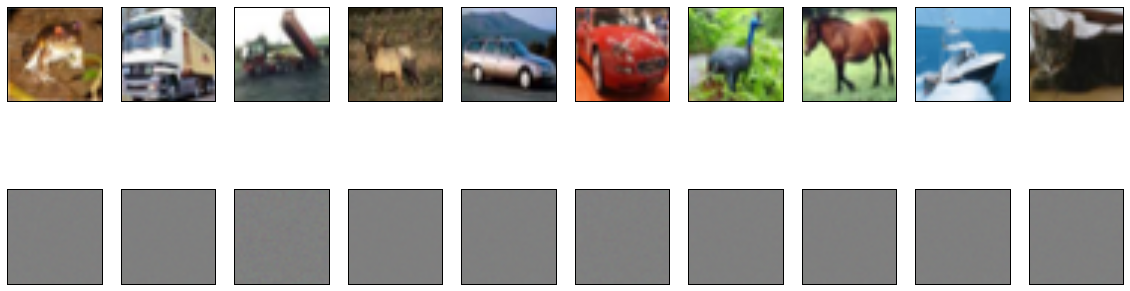

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    #ax = plt.subplot(2, n, i + 1 + n)
    #plt.imshow(encoded_imgs[i].reshape(6, 6))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
   
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_pred[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

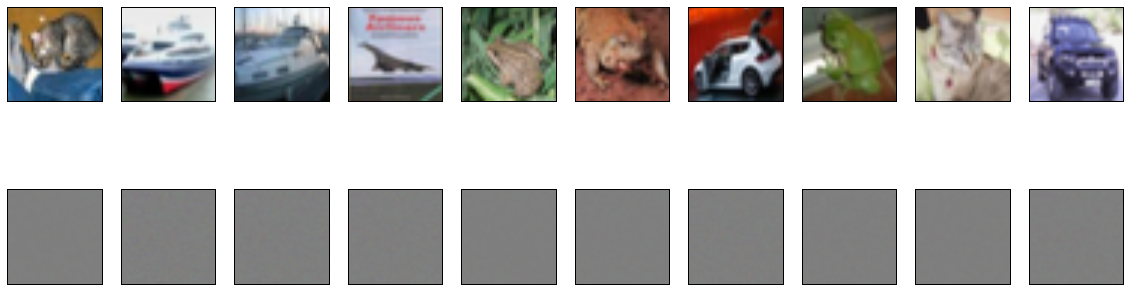

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    #ax = plt.subplot(2, n, i + 1 + n)
    #plt.imshow(encoded_imgs[i].reshape(6, 6))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
   
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_pred[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()